In [201]:
import setup; import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from speech_pause_indicator import speech as original_speech
from dtw import dtw ; import librosa.display ; import librosa

# 1 and 2

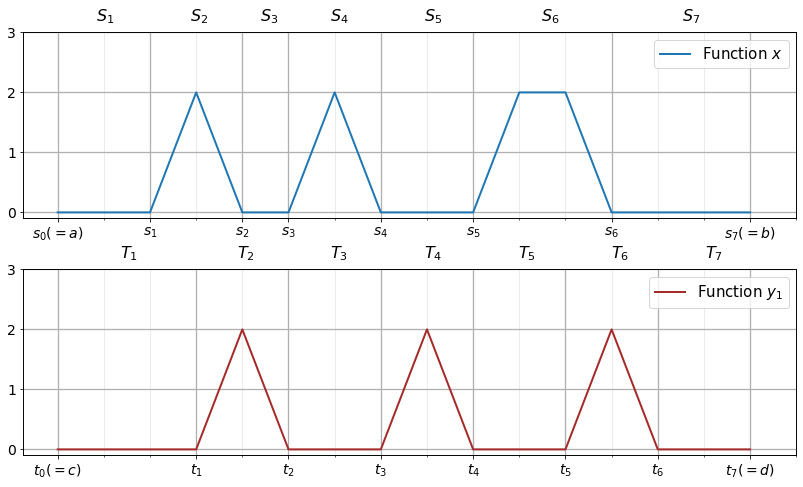

In [263]:
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_size_inches(12, 7)   
fig.tight_layout(pad=3.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$s_5$', '$s_6$', '$s_7(=b)$']

ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$S_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax1.legend(fontsize = 15);
##############################

b = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]
ax2.plot(positions, b, linewidth=2, label = 'Function $y_1$', color = 'brown')
# labels2 = ['$t_' + str(p) + '$' for p in positions]

labels2 = ['$t_0 (=c)$', '$t_1$', '$t_2$', '$t_3$', '$t_4$', '$t_5$', '$t_6$', '$t_7(=d)$']
ax2.set_xticks([0, 3, 5, 7, 9, 11, 13, 15]) 
ax2.set_xticklabels(labels2, fontsize = '14');

ax2.set_yticks([0, 1, 2, 3]) 
ax2.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax2.grid(True)

labels2 = ['$T_' + str(p) + '$' for p in positions]
ax = ax2.twiny()
ax.set_xticks([1.5, 4, 6, 8, 10, 12, 14])
ax.set_xbound(ax2.get_xbound())
ax.set_xticklabels(labels2[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 


ax2.set_xticks(minor_ticks,minor=True)
ax2.grid(which="minor", alpha = minor_alpha)
ax2.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax2.legend(fontsize = 15);

plt.savefig('/Users/ninismacbook/desktop/xy.png', dpi=500)

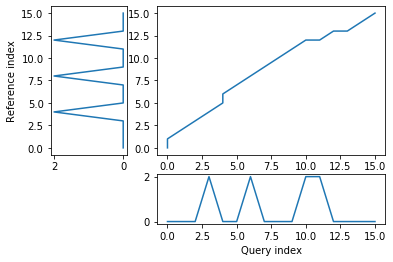

distance:  0.0


In [206]:
alignment = dtw(a, b, keep_internals=True)
alignment.plot("threeway")
print('distance: ', alignment.distance)

## Align 1 and 3

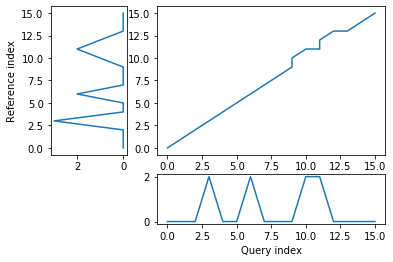

distance:  4.0
[ 0  1  2  3  4  5  6  7  8  9  9 10 11 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 11 12 13 13 14 15]
0 0 0
1 1 0
2 2 0
3 3 1
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0
9 10 1
10 11 0
11 11 0
11 12 1
12 13 0
13 13 0
14 14 0
15 15 0


In [208]:
alignment = dtw(a, c, keep_internals=True)
alignment.plot("threeway")
print('distance: ', alignment.distance)
print(alignment.index1)
print(alignment.index2)
for i in range(len(alignment.index1)):
    print(alignment.index1[i], alignment.index2[i], np.abs(a[alignment.index1[i]]-c[alignment.index2[i]]))

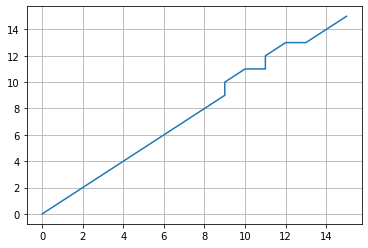

In [209]:
plt.plot(alignment.index1, alignment.index2)
plt.grid()

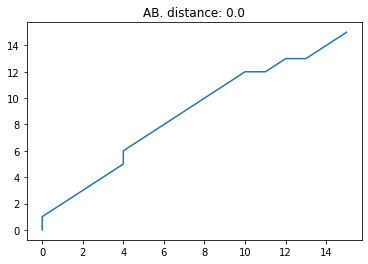

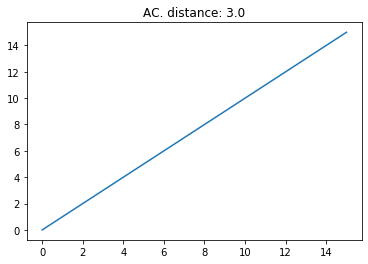

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

dtw_classic, path_classic = dtw(a, b, dist = 'absolute',
                                method='classic', return_path=True)
plt.plot(path_classic[0], path_classic[1])
plt.title('AB. distance: ' + str(dtw_classic))

plt.subplots(1, 1)
dtw_classic, path_classic = dtw(a, c, dist = 'absolute',
                                method='classic', return_path=True)
plt.plot(path_classic[0], path_classic[1])
plt.title('AC. distance: '+ str(dtw_classic));

<font size="8" color="#6AA84F"> $\varphi_0 \;\; \varphi_1 \;\; \varphi_2 \;\; \varphi_3 \;\; \varphi_4 \;\; \varphi_5 \;\; \varphi_6 \;\;\varphi_7$</font>

<font size="8" color="orange"> $ C_0 \;\; C_1 \;\; C_2 \;\; C_3 \;\; C_4 \;\; C_5 \;\; C_6 \;\;C_7 $  </font>

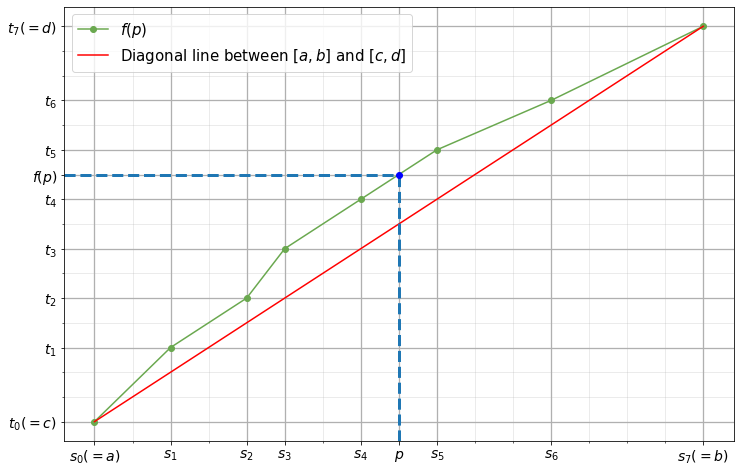

In [178]:
fig, ax3 = plt.subplots(1, 1);
fig.set_size_inches(12, 8)   

positions = np.arange(17)

labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$p$', '$s_5$', '$s_6$', '$s_7(=b)$']
labels2 = ['$t_0 (=c)$', '$t_1$', '$t_2$', '$t_3$', '$t_4$', '$f(p)$', '$t_5$', '$t_6$', '$t_7(=d)$']

x = [0, 2, 4, 5, 7, 9, 12, 16]
y = [0, 3, 5, 7, 9, 11, 13, 16]
plt.plot(x, y, marker='o', color="#6AA84F", label = '$f(p)$')
plt.plot(positions, positions, color="red", label = 'Diagonal line between $[a, b]$ and $[c, d]$')

ax3.set_xticks([0, 2, 4, 5, 7, 8, 9, 12, 16]) 
ax3.set_xticklabels(labels1, fontsize = '14'); 
ax3.set_yticks([0, 3, 5, 7, 9, 10, 11, 13, 16]) 
ax3.set_yticklabels(labels2, fontsize = '14');
    
ax3.set_xticks(minor_ticks,minor=True)
ax3.set_yticks(minor_ticks,minor=True)

ax3.grid(which="minor", alpha = minor_alpha)
ax3.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)

ax3.axvline(x=8, ymax = 0.61, linestyle = '--', linewidth = 3) 
ax3.axhline(y=10, xmax = 0.5, linestyle = '--', linewidth = 3)
plt.plot(8, 10,'ro', color = 'blue') 

plt.legend(fontsize = 15)
plt.savefig('/Users/ninismacbook/desktop/example-alignment.png', dpi=500)

# 1 and 3

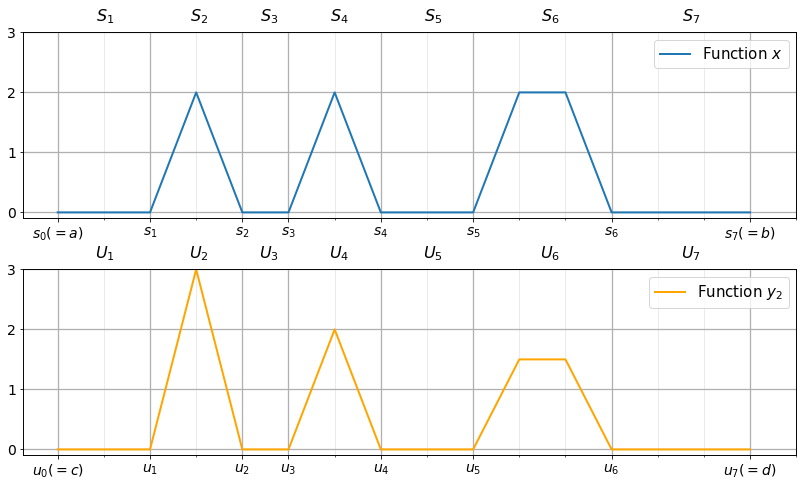

In [271]:
fig, (ax1, ax3) = plt.subplots(2, 1);
fig.set_size_inches(12, 7)   
fig.tight_layout(pad=3.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$s_5$', '$s_6$', '$s_7(=b)$']

# ax1.set_title('Function $x$',fontweight="bold", size=18) # Title
ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$S_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax1.legend(fontsize = 15);

##############################

c = [0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1.5, 1.5, 0, 0, 0, 0]

ax3.plot(positions, c, linewidth=2, color = 'orange', label = 'Function $y_2$')

labels3 = ['$u_0 (=c)$', '$u_1$', '$u_2$', '$u_3$', '$u_4$','$u_5$', '$u_6$', '$u_7(=d)$']
ax3.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax3.set_xticklabels(labels3, fontsize = '14'); 
ax3.set_yticks([0, 1, 2, 3]) 
ax3.set_yticklabels([0, 1, 2, 3], fontsize = '14');

labels3 = ['$U_' + str(p) + '$' for p in positions]
ax = ax3.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax3.get_xbound())
ax.set_xticklabels(labels3[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 


ax3.set_xticks(minor_ticks,minor=True)
ax3.grid(which="minor", alpha = minor_alpha)
ax3.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax3.set_ylim(-.1, 3)
ax3.legend(fontsize = 15);

plt.savefig('/Users/ninismacbook/desktop/why-is-d-necessary-original.png', dpi=500)

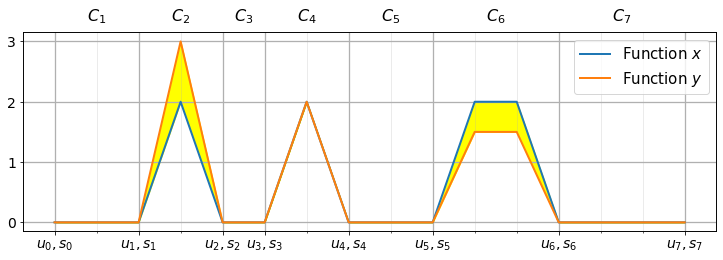

In [272]:
fig, (ax1) = plt.subplots(1, 1);
fig.set_size_inches(12, 5)   
fig.tight_layout(pad=7.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$C_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)

##############################
# positions = np.arange(17)
c = [0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1.5, 1.5, 0, 0, 0, 0]
ax1.plot(positions, c, linewidth=2, label = 'Function $y$')

labels3 = ['$u_' + str(p) + ', s_' + str(p) + '$' for p in positions]
ax1.set_xticklabels(labels3, fontsize = '14'); 
ax1.legend(fontsize = 15);
ax1.fill_between(positions, a, c, color = 'yellow', label = 'Between Function $x$ and $y$')

plt.savefig('/Users/ninismacbook/desktop/d.png', dpi=500)